In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn import datasets

# **Modelo para 2 Centros**

## **1. Creacion de datos (make_blobs)**

In [81]:
X, y = datasets.make_blobs(n_samples=2000, centers=2, n_features=2, random_state=0, cluster_std=0.8)
X

array([[ 2.60869514,  1.34917423],
       [ 1.46581183,  3.23058995],
       [ 2.90744729,  1.18338659],
       ...,
       [ 0.84566612,  4.2346231 ],
       [ 0.74506591,  2.70487575],
       [-0.33446882,  2.88267643]])

In [82]:
y

array([1, 0, 1, ..., 0, 0, 0])

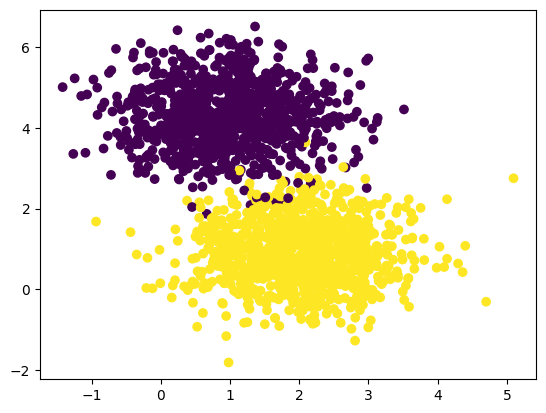

In [83]:
plt.scatter(x=X[:,0], y=X[:,1], c=y)

## **2. Split dataset (train/test)**

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1400, 2) (600, 2) (1400,) (600,)


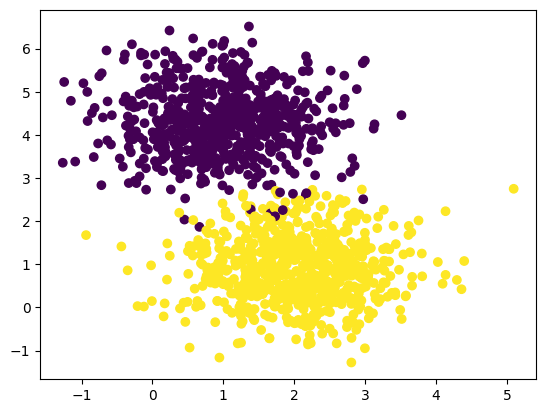

In [86]:
plt.scatter(x=X_train[:,0], y=X_train[:,1], c=y_train)

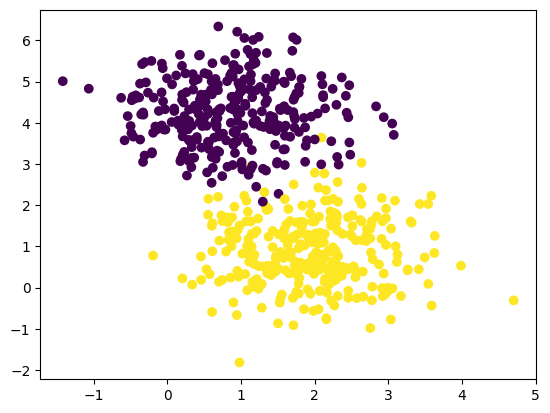

In [87]:
plt.scatter(x=X_test[:,0], y=X_test[:,1], c=y_test)

## **3. Creacion del Modelo**

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [89]:
## Arquitectura
model = keras.Sequential()

model.add(Dense(units=2))  # input --> x1, x2
model.add(Dense(units=1, activation = "sigmoid"))  # output --> y

## Optimizador
from keras.optimizers import SGD
opt = SGD(learning_rate=0.01)

## Compilacion del Modelo
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

## Entrenamiento
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
44/44 [==============================] - 1s 6ms/step - loss: 0.4605 - accuracy: 0.9043 - val_loss: 0.3352 - val_accuracy: 0.9450
Epoch 2/50
44/44 [==============================] - 0s 3ms/step - loss: 0.2836 - accuracy: 0.9521 - val_loss: 0.2497 - val_accuracy: 0.9417
Epoch 3/50
44/44 [==============================] - 0s 3ms/step - loss: 0.2233 - accuracy: 0.9500 - val_loss: 0.2111 - val_accuracy: 0.9383
Epoch 4/50
44/44 [==============================] - 0s 3ms/step - loss: 0.1926 - accuracy: 0.9493 - val_loss: 0.1882 - val_accuracy: 0.9417
Epoch 5/50
44/44 [==============================] - 0s 3ms/step - loss: 0.1734 - accuracy: 0.9507 - val_loss: 0.1725 - val_accuracy: 0.9433
Epoch 6/50
44/44 [==============================] - 0s 3ms/step - loss: 0.1599 - accuracy: 0.9521 - val_loss: 0.1609 - val_accuracy: 0.9467
Epoch 7/50
44/44 [==============================] - 0s 4ms/step - loss: 0.1498 - accuracy: 0.9529 - val_loss: 0.1520 - val_accuracy: 0.9483
Epoch 8/50
44/44 [==

## **4. Evaluación del Modelo**

In [90]:
dfh = pd.DataFrame(model.history.history)
dfh.head()

,loss,accuracy,val_loss,val_accuracy
0,0.460528,0.904286,0.335157,0.945000
1,0.283568,0.952143,0.249721,0.941667
2,0.223347,0.950000,0.211060,0.938333
3,0.192637,0.949286,0.188207,0.941667
4,0.173407,0.950714,0.172549,0.943333


In [91]:
dfh.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<Axes: >

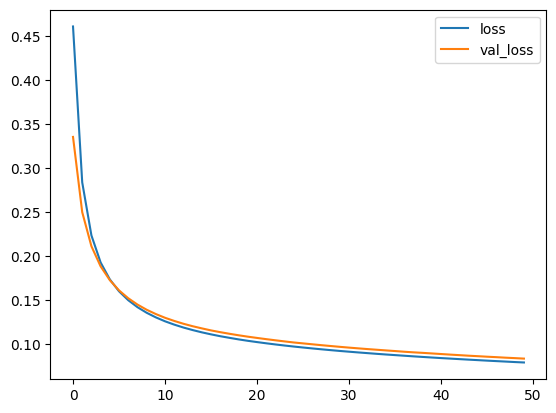

In [92]:
dfh[["loss", "val_loss"]].plot()

<Axes: >

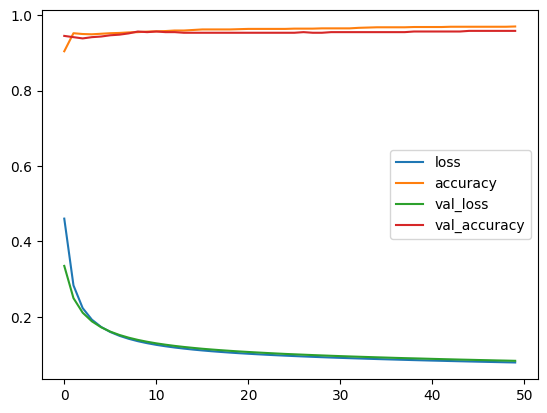

In [93]:
dfh.plot()

In [94]:
y_pred = model.predict(X_test)
y_pred[0:5]

19/19 [==============================] - 0s 1ms/step


array([[3.9085120e-04],
       [9.9907249e-01],
       [1.6408034e-05],
       [1.2779542e-02],
       [2.0149790e-02]], dtype=float32)

In [95]:
df_pred = pd.Series(y_pred.reshape(1,-1)[0])
df_pred[df_pred>0.5] = 1
df_pred[df_pred<=0.5] = 0
df_pred

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
595    0.0
596    0.0
597    0.0
598    1.0
599    0.0
Length: 600, dtype: float32

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

In [97]:
print(classification_report(y_test, df_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       297
           1       0.97      0.94      0.96       303

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [98]:
confusion_matrix(y_test, df_pred)

array([[289,   8],
       [ 17, 286]])

# **Modelo para 3 centros**

## **1. Creacion de datos (make_blobs)**

In [99]:
X, y = datasets.make_blobs(n_samples=[700, 700, 600], centers=None, n_features=2, random_state=0, cluster_std=0.8)

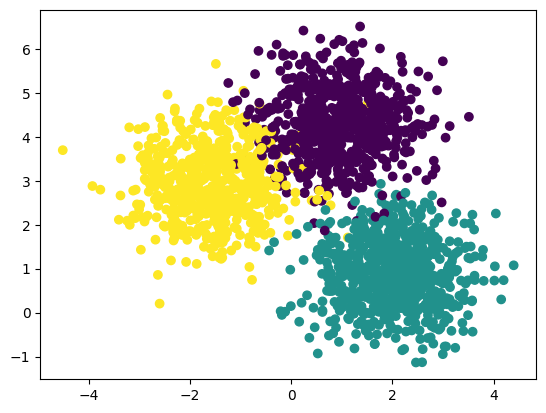

In [100]:
plt.scatter(x=X[:,0], y=X[:,1], c=y)

## **2. Split dataset (train/test)**

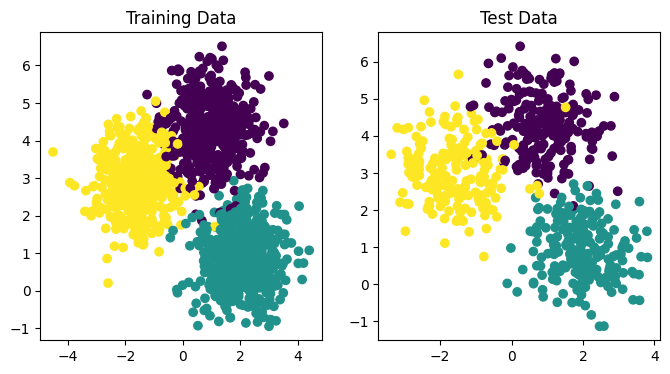

In [101]:
def split_datos(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  fig, ax = plt.subplots(1,2, figsize=(8,4))
  ax[0].scatter(x=X_train[:,0], y=X_train[:,1], c=y_train)
  ax[1].scatter(x=X_test[:,0], y=X_test[:,1], c=y_test)
  ax[0].set_title("Training Data")
  ax[1].set_title("Test Data")

  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_datos(X, y)

In [102]:
y_train_dummy = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_train_dummy[-10:]

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [103]:
y_train[-10:]

array([1, 2, 0, 0, 1, 0, 0, 0, 0, 0])

In [104]:
y_test_dummy = tf.keras.utils.to_categorical(y_test, num_classes=3)
y_test_dummy

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

## **3. Creacion del Modelo**

In [105]:
def entrenar_modelo(optimizer, X_train, y_train_dummy, X_test, y_test_dummy, hidden_act, output_act, loss_func, lr):
  ## Arquitectura
  model = keras.Sequential()

  model.add(Dense(units=2))  # input --> x1, x2
  model.add(Dense(units=5, activation = hidden_act))
  model.add(Dense(units=3, activation = output_act))  # output --> y1, y2, y3

  ## Optimizador
  if optimizer == "SGD":
    from keras.optimizers import SGD
    opt = SGD(learning_rate=0.01)
  elif optimizer == "Adam":
    from keras.optimizers import Adam
    opt = Adam(learning_rate=0.01)

  ## Compilacion del Modelo
  model.compile(optimizer=opt, loss=loss_func, metrics=["accuracy"])
  ## Si class binaria --> act="sigmoid", loss = "binary_crossentropy"
  ## Si class multiple --> act="softmax", loss = "categorical_crossentropy"

  ## Entrenamiento
  model.fit(X_train, y_train_dummy, epochs=50, batch_size=32, validation_data=(X_test, y_test_dummy))

  return model


optimizer = "Adam"  ## SGD, Adam
hidden_act = "relu"  ## tanh, sigmoid, linear, softmax, relu
output_act = "softmax"
loss_func = "categorical_crossentropy"  ## categorical_crossentropy, binary_crossentropy, sparse_categorical_crossentropy
lr = 0.01

modelo = entrenar_modelo(optimizer, X_train, y_train_dummy, X_test, y_test_dummy, hidden_act, output_act, loss_func, lr)


Epoch 1/50
44/44 [==============================] - 1s 7ms/step - loss: 0.8815 - accuracy: 0.5479 - val_loss: 0.6636 - val_accuracy: 0.7617
Epoch 2/50
44/44 [==============================] - 0s 4ms/step - loss: 0.4295 - accuracy: 0.9314 - val_loss: 0.3189 - val_accuracy: 0.9567
Epoch 3/50
44/44 [==============================] - 0s 3ms/step - loss: 0.2367 - accuracy: 0.9607 - val_loss: 0.2200 - val_accuracy: 0.9600
Epoch 4/50
44/44 [==============================] - 0s 4ms/step - loss: 0.1682 - accuracy: 0.9679 - val_loss: 0.1781 - val_accuracy: 0.9650
Epoch 5/50
44/44 [==============================] - 0s 3ms/step - loss: 0.1372 - accuracy: 0.9679 - val_loss: 0.1530 - val_accuracy: 0.9650
Epoch 6/50
44/44 [==============================] - 0s 3ms/step - loss: 0.1168 - accuracy: 0.9714 - val_loss: 0.1381 - val_accuracy: 0.9650
Epoch 7/50
44/44 [==============================] - 0s 3ms/step - loss: 0.1059 - accuracy: 0.9721 - val_loss: 0.1335 - val_accuracy: 0.9633
Epoch 8/50
44/44 [==

## **4. Evaluación del Modelo**

In [106]:
hist = modelo.history.history

19/19 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       224
           1       0.98      0.99      0.99       195
           2       0.95      0.97      0.96       181

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600

[[211   4   9]
 [  1 194   0]
 [  5   0 176]]


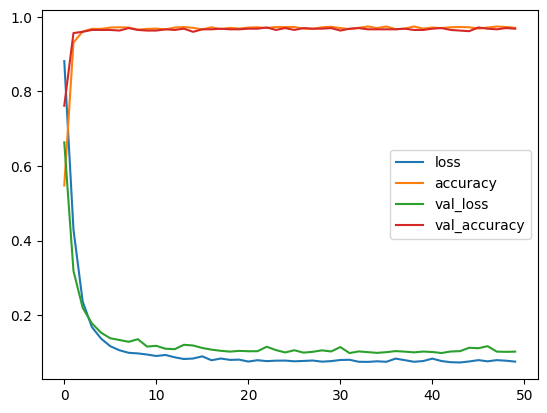

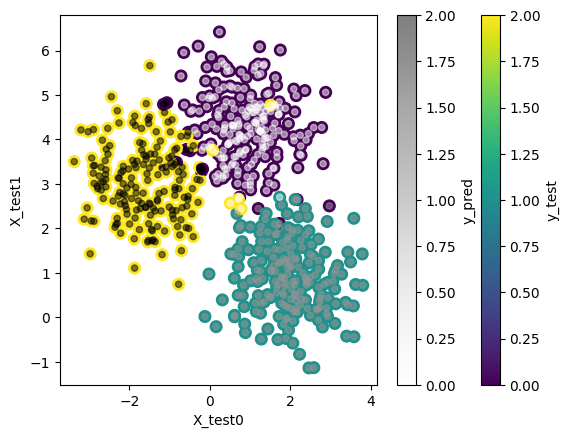

In [107]:
def evaluacion_modelo(modelo, hist, X_test, y_test):
  ## HISTORY DE LOSS Y ACCURACY
  dfh = pd.DataFrame(hist)
  dfh.plot()

  ## PREDICCIONES
  y_test_probs = modelo.predict(X_test)
  y_pred = y_test_probs.argmax(axis=-1)

  dfy_test = pd.Series(y_test)
  dfy_pred = pd.Series(y_pred)
  dfX_test = pd.DataFrame(X_test)

  df_eval = pd.concat([dfX_test, dfy_test, dfy_pred], axis="columns")
  df_eval.columns = ["X_test0", "X_test1", "y_test", "y_pred"]

  ax = df_eval.plot.scatter(x="X_test0", y="X_test1", c="y_test", cmap="viridis", s=70)
  df_eval.plot.scatter(x="X_test0", y="X_test1", c="y_pred", ax=ax, alpha=0.5)

  ## EVALUACION CONFUSION MATRIX
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

evaluacion_modelo(modelo, hist, X_test, y_test)

# **Modelo Circulos**

## **1. Creacion de datos (make_circles)**

In [108]:
X, y = datasets.make_circles(n_samples=2000, factor=0.5, noise=0.1, random_state=170)
X

array([[-0.50651507, -0.24286995],
       [-0.33253944, -0.91176528],
       [ 0.24992005,  0.53191359],
       ...,
       [-0.32922745,  0.48167285],
       [ 1.01144741,  0.29420568],
       [ 0.96098357, -0.50130486]])

In [109]:
y

array([1, 0, 1, ..., 1, 0, 0])

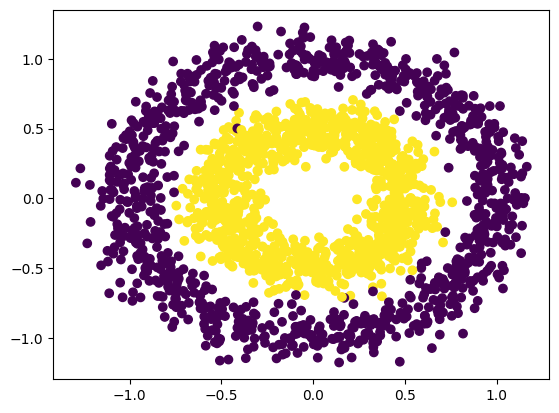

In [112]:
plt.scatter(x=X[:,0], y=X[:,1], c=y)

## **2. Split dataset (train/test)**

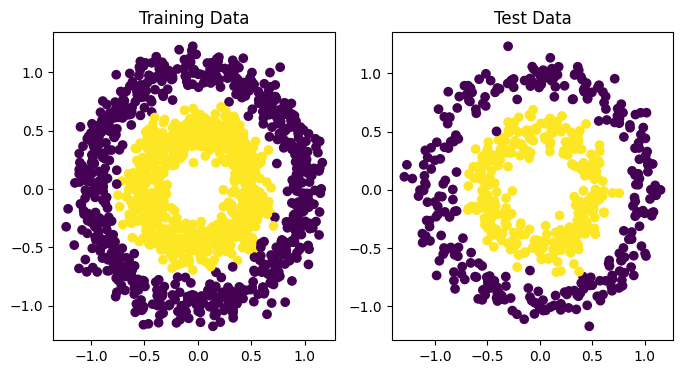

In [113]:
def split_data(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  fig, ax = plt.subplots(1,2, figsize=(8,4))
  ax[0].scatter(x=X_train[:,0], y=X_train[:,1], c=y_train)
  ax[1].scatter(x=X_test[:,0], y=X_test[:,1], c=y_test)
  ax[0].set_title("Training Data")
  ax[1].set_title("Test Data")

  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y)

## **3. Creacion del Modelo**

In [114]:
tf.random.set_seed(100)

In [115]:
def entrenar_modelo(optimizer, X_train, y_train, X_test, y_test, hidden_act, output_act, loss_func, lr):
  ## Arquitectura
  model = keras.Sequential()

  model.add(Dense(units=2))  # input --> x1, x2
  model.add(Dense(units=5, activation = hidden_act))
  model.add(Dense(units=5, activation = hidden_act))
  model.add(Dense(units=1, activation = output_act))  # output --> y1, y2, y3

  ## Optimizador
  if optimizer == "SGD":
    from keras.optimizers import SGD
    opt = SGD(learning_rate=0.01)
  elif optimizer == "Adam":
    from keras.optimizers import Adam
    opt = Adam(learning_rate=0.01)

  ## Compilacion del Modelo
  model.compile(optimizer=opt, loss=loss_func, metrics=["accuracy"])
  ## Si class binaria --> act="sigmoid", loss = "binary_crossentropy"
  ## Si class multiple --> act="softmax", loss = "categorical_crossentropy"

  ## Entrenamiento
  model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=0)

  return model

optimizer = "Adam"  ## SGD, Adam
hidden_act = "relu"  ## tanh, sigmoid, linear, softmax, relu
output_act = "sigmoid"
loss_func = "binary_crossentropy"  ## categorical_crossentropy, binary_crossentropy, sparse_categorical_crossentropy
lr = 0.03

modelo = entrenar_modelo(optimizer, X_train, y_train, X_test, y_test, hidden_act, output_act, loss_func, lr)

## **4. Evaluación del Modelo**

In [117]:
hist = modelo.history.history

19/19 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       302
           1       0.99      0.97      0.98       298

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600

[[300   2]
 [  9 289]]


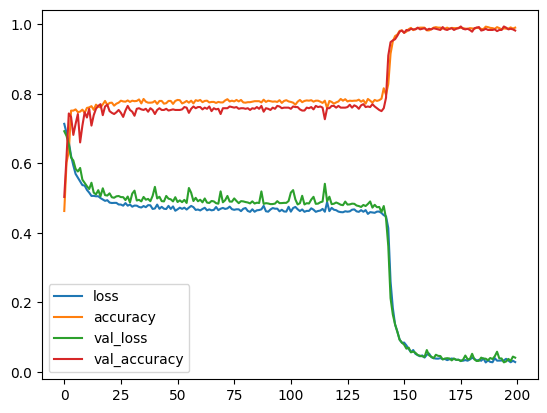

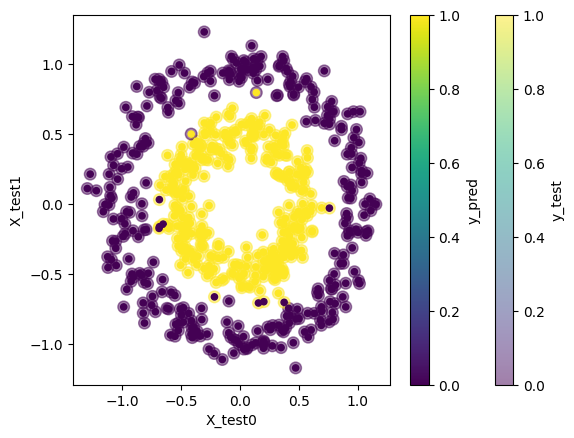

In [122]:
def evaluacion_modelo(modelo, hist, X_test, y_test):
  ## HISTORY DE LOSS Y ACCURACY
  dfh = pd.DataFrame(hist)
  dfh.plot()

  ## PREDICCIONES
  y_test_probs = modelo.predict(X_test)
  # y_pred = y_test_probs.argmax(axis=-1)

  dfy_test = pd.Series(y_test)
  dfy_pred = pd.Series(y_test_probs.reshape(1,-1)[0])
  dfy_pred[dfy_pred>0.5] = 1
  dfy_pred[dfy_pred<=0.5] = 0
  dfX_test = pd.DataFrame(X_test)

  df_eval = pd.concat([dfX_test, dfy_test, dfy_pred], axis="columns")
  df_eval.columns = ["X_test0", "X_test1", "y_test", "y_pred"]

  ax = df_eval.plot.scatter(x="X_test0", y="X_test1", c="y_test", cmap="viridis", s=70, alpha=0.5)
  df_eval.plot.scatter(x="X_test0", y="X_test1", c="y_pred", ax=ax)

  ## EVALUACION CONFUSION MATRIX
  print(classification_report(y_test, dfy_pred.values))
  print(confusion_matrix(y_test, dfy_pred.values))

evaluacion_modelo(modelo, hist, X_test, y_test)